# TruthScan
### Comprehensive Fake News Detection Project Report

## Table of Contents:
1. Introduction
2. Project Definition
3. Dataset Details
4. Exploratory Data Analysis (EDA)
5. Data Preprocessing
6. Feature Engineering
7. Model Development
8. Model Evaluation
9. Data Visualization and Plots
10. Conclusion and Future Work

### 1. Introduction
In the digital age, the rapid dissemination of information has brought with it the challenge of distinguishing between genuine and fabricated news. The proliferation of fake news has far-reaching consequences, affecting public opinion, political landscapes, and social cohesion. The TruthScan project emerges as a response to this pressing issue, leveraging the power of artificial intelligence and natural language processing to combat the spread of misinformation.
##### 1.1 Background:
The term "fake news" gained prominence in the mid-2010s, particularly during the 2016 U.S. presidential election. However, the concept of deliberately spreading false information for political, economic, or social gain has a long history. In the digital era, social media platforms and online news outlets have exponentially increased the speed and reach of information sharing, making it easier for fake news to spread rapidly.
##### 1.2 Impact of Fake news:
The consequences of fake news are multifaceted and significant:<br>
1. Political Impact: Fake news can influence election outcomes, shape public policy debates, and erode trust in democratic institutions.
2. Social Impact: It can exacerbate social divisions, fuel conspiracy theories, and lead to real-world violence or unrest.
3. Economic Impact: Financial markets can be manipulated through the spread of false information, leading to economic instability.
4. Health Impact: During crises like the COVID-19 pandemic, fake news about treatments or prevention can have dire health consequences.
##### 1.3 Role of AI in Combating Fake News:
Artificial Intelligence, particularly Natural Language Processing (NLP) and Machine Learning (ML), offers powerful tools to detect and combat fake news:<br>
1. Pattern Recognition: ML algorithms can identify linguistic patterns and structural characteristics common in fake news articles.
2. Scale and Speed: AI systems can process vast amounts of information much faster than human fact-checkers.
3. Continuous Learning: With proper implementation, AI models can adapt to evolving tactics used by creators of fake news.
##### 1.4 Project Overview:
The TruthScan project aims to develop a robust, AI-driven system for detecting fake news. By combining advanced NLP techniques with machine learning classifiers, we seek to create a tool that can accurately distinguish between genuine and fabricated news articles. This report details our approach, methodology, and findings in this endeavor.

### 2. Project Definition
##### 2.1 Objectives:
The TruthScan project has several key objectives:<br>
1. Develop a High-Accuracy Classifier: Create a machine learning model capable of distinguishing between genuine and fake news articles with high accuracy.
2. Explore Multiple Algorithms: Implement and compare various machine learning algorithms to identify the most effective approach for fake news detection.
3. Feature Engineering: Develop sophisticated feature extraction techniques to capture subtle linguistic and structural differences between real and fake news articles.
4. Model Interpretability: Strive for a balance between model accuracy and interpretability, allowing for insights into the decision-making process of the classifier.
5. Scalability: Design the system to handle large volumes of text data efficiently, making it suitable for real-time or near-real-time applications.
6. Contribute to Media Literacy: Provide insights that can contribute to broader efforts in enhancing public awareness and critical thinking skills regarding news consumption.
##### 2.2 Methodology Overview:
The project follows these key steps:<br>
1. Data Collection: Utilizing a dataset of labeled genuine and fake news articles.
2. Exploratory Data Analysis: Understanding the characteristics and patterns in the dataset.
3. Data Preprocessing: Cleaning and preparing the text data for analysis.
4. Feature Engineering: Transforming text data into numerical features using TF-IDF vectorization.
5. Model Development: Implementing and training multiple machine learning classifiers.
6. Model Evaluation: Assessing and comparing the performance of different models.
7. Data Vizualization & Plots: Plotting various features and evaluation of models
##### 2.3 Ethical Considerations:
The project acknowledges and addresses several ethical considerations:<br>
1. Bias Mitigation: Efforts are made to ensure the training data is diverse and representative, minimizing potential biases in the model.
2. Transparency: The limitations and potential biases of the model are clearly communicated to end-users.
3. Privacy: The project adheres to data protection regulations and ethical guidelines in handling news articles and related data.
4. Misuse Prevention: Considerations are given to preventing the system from being used to censor legitimate news or opinions.

### 3. Dataset Details
##### 3.1 Data Source: 
The dataset used in this project consists of two CSV files:<br>
1. 'Fake.csv': Contains fake news articles
2. 'True.csv': Contains genuine news articles
##### 3.2 Dataset Features:
Each article in the dataset includes the following features:<br>
1. title: The headline of the news article
2. text: The main content of the article (may be incomplete)
3. subject: The category or topic of the news article
4. date: The publication date of the article
5. class: A binary label indicating whether the article is real (1) or fake (0)
##### 3.3 Dataset Statistics:

In [1]:
import pandas as pd

fake_data = pd.read_csv('D:\\GTU Sem-5\\MLP\\Project\\Data\\Fake.csv')
true_data = pd.read_csv('D:\\GTU Sem-5\\MLP\\Project\\Data\\True.csv')

print("Fake news articles:", fake_data.shape[0])
print("Real news articles:", true_data.shape[0])
print("Total articles:", fake_data.shape[0] + true_data.shape[0])

Fake news articles: 23481
Real news articles: 21417
Total articles: 44898


### 4. Exploratory Data Analysis (EDA)
##### 4.1 Data Loading and Initial Inspection:
We begin by loading the datasets and examining their structure:

In [2]:
print("Fake Data Info:")
fake_data.info()

Fake Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [3]:
print("\nTrue Data Info:")
true_data.info()


True Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [4]:
print("\nFake Data Sample:")
fake_data.head()


Fake Data Sample:


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
print("\nTrue Data Sample:")
true_data.head()


True Data Sample:


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


This step allows us to understand the structure of our data, identify any missing values, and get a sense of the content we're working with.
##### 4.2 Data Combination and Labeling:
We combine the fake and true datasets, adding a 'class' column to distinguish between them:

In [6]:
fake_data["class"] = 0
true_data["class"] = 1
data = pd.concat([fake_data, true_data], axis=0)
data = data.sample(frac=1).reset_index(drop=True)  # Shuffle the combined dataset

data.head()

,title,text,subject,date,class
0,Trump Names Alt-Right Racist As His Chief Str...,If anyone had any deluded designs that Donald ...,News,"November 13, 2016",0
1,Starbucks And Barnes & Noble Joining Target I...,While there has never been a confirmed instanc...,News,"May 7, 2016",0
2,LISTEN TO THEM LAUGH! Undercover VIDEO Capture...,A shocking new video has just been released by...,politics,"May 25, 2017",0
3,Indonesia group pinpoints suspected mass grave...,JAKARTA (Reuters) - The head of an Indonesian ...,worldnews,"November 15, 2017",1
4,Out in the cold: New U.S. budget priorities th...,"(Reuters) - When Paul Ryan, speaker of the U.S...",politicsNews,"March 5, 2017",1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


##### 4.3 Text Length Analysis:
We analyze the length of articles to identify any patterns:

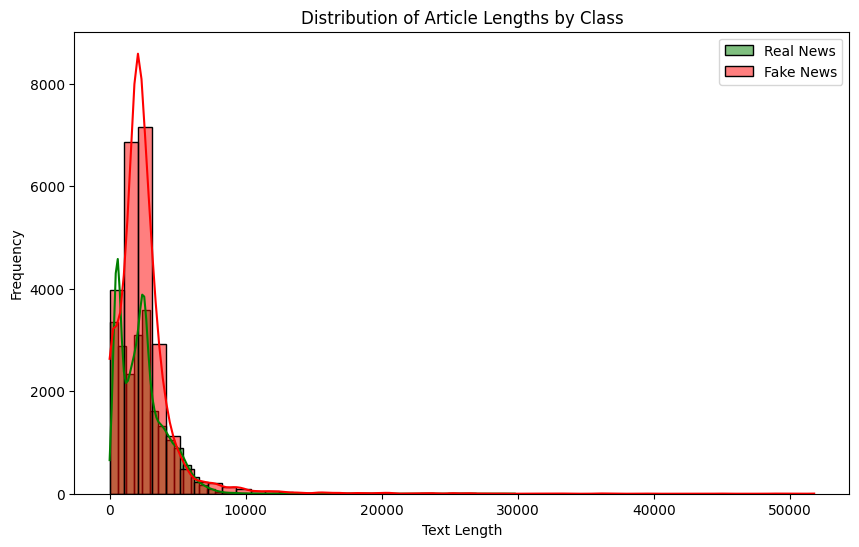

Average length of real news articles: 2383.278517065882
Average length of fake news articles: 2547.396235254035


In [8]:
data['text_length'] = data['text'].apply(len)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data[data['class'] == 1]['text_length'], bins=50, color='green', label='Real News', kde=True)
sns.histplot(data[data['class'] == 0]['text_length'], bins=50, color='red', label='Fake News', kde=True)
plt.legend()
plt.title('Distribution of Article Lengths by Class')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

print("Average length of real news articles:", data[data['class'] == 1]['text_length'].mean())
print("Average length of fake news articles:", data[data['class'] == 0]['text_length'].mean())

This visualization helps us understand if there are significant differences in the length of real versus fake news articles.
### 5. Data Pre-processing
##### 5.1 Text Cleaning Function:
We define a function to clean and preprocess the text data:

In [9]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\[.*?\]", "", text)  # Remove text within square brackets
    text = re.sub(r"\W", " ", text)  # Remove non-word characters
    text = re.sub(r"https?://\S+\s?", "", text)  # Remove URLs
    text = re.sub(r"<.*?>", "", text)  # Remove HTML tags
    text = re.sub(r"[%s]" % re.escape(string.punctuation), "", text)  # Remove punctuation
    text = re.sub(r"\n", " ", text)  # Remove newline characters
    text = re.sub(r"\w*\d\w*", "", text)  # Remove words containing numbers
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

##### 5.2 Applying Text Cleaning:
We apply the cleaning function to our dataset:

In [10]:
data['cleaned_text'] = data['text'].apply(clean_text)
data['cleaned_text'].head()

0    anyone deluded design donald trump going stack...
1    never confirmed instance transgender people ch...
2    shocking new video released center medical pro...
3    jakarta reuters head indonesian group represen...
4    reuters paul ryan speaker u house representati...
Name: cleaned_text, dtype: object

### 6. Feature Engineering
We use TF-IDF (Term Frequency-Inverse Document Frequency) vectorization to convert our cleaned text data into numerical features:

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = data['cleaned_text']
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print("Shape of training features:", X_train.shape)
print("Shape of testing features:", X_test.shape)

Shape of training features: (35918, 5000)
Shape of testing features: (8980, 5000)


### 7. Model Development
We implement three different machine learning models:
##### 7.1 Logistic Regression:

In [12]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

##### 7.2 Naive Bayes:

In [13]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

##### 7.3 Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 8. Model Evaluation
We evaluate each model using accuracy scores and classification reports:

In [15]:
from sklearn.metrics import accuracy_score, classification_report

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return predictions, accuracy, report

models = {
    "Logistic Regression": lr_model,
    "Naive Bayes": nb_model,
    "Random Forest": rf_model
}

for name, model in models.items():
    predictions, accuracy, report = evaluate_model(model, X_test, y_test)
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)


Logistic Regression Results:
Accuracy: 0.9857
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4763
           1       0.98      0.99      0.98      4217

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


Naive Bayes Results:
Accuracy: 0.9296
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      4763
           1       0.93      0.92      0.92      4217

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980


Random Forest Results:
Accuracy: 0.9983
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4763
           1       1.00      1.00      1.

### 9. Data Vizualization & Plots
To gain deeper insights into our dataset and the performance of our models, we've created several visualizations. These plots help us understand the characteristics of fake and real news articles, as well as the effectiveness of our classification models.
##### 9.1 Distribution of Article Lengths:

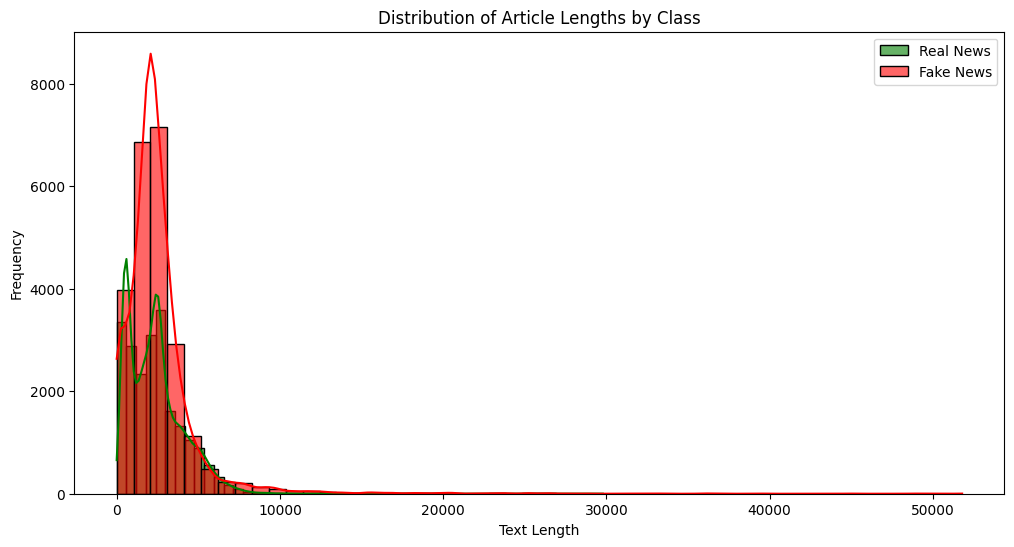

Average length of real news articles: 2383.278517065882
Average length of fake news articles: 2547.396235254035


In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(data[data['class'] == 1]['text_length'], bins=50, color='green', label='Real News', kde=True, alpha=0.6)
sns.histplot(data[data['class'] == 0]['text_length'], bins=50, color='red', label='Fake News', kde=True, alpha=0.6)
plt.legend()
plt.title('Distribution of Article Lengths by Class')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

print("Average length of real news articles:", data[data['class'] == 1]['text_length'].mean())
print("Average length of fake news articles:", data[data['class'] == 0]['text_length'].mean())

This histogram shows the distribution of article lengths for both real and fake news. It helps us identify any significant differences in length between the two classes.
##### 9.2 Word Cloud for Fake and Real News

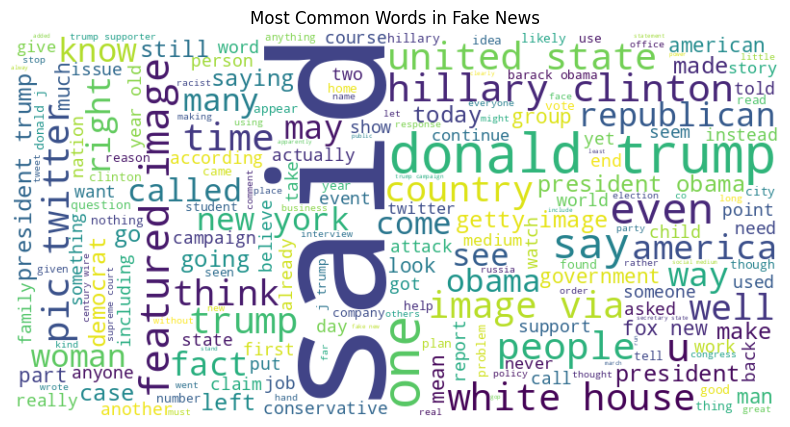

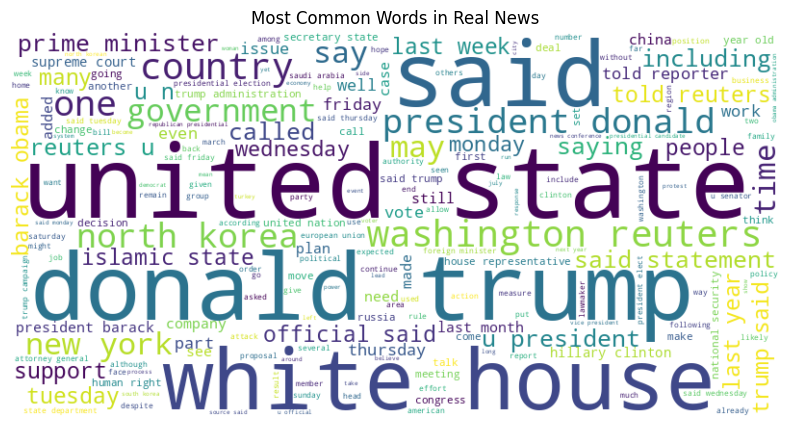

In [17]:
from wordcloud import WordCloud

def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

fake_text = ' '.join(data[data['class'] == 0]['cleaned_text'])
real_text = ' '.join(data[data['class'] == 1]['cleaned_text'])

create_wordcloud(fake_text, 'Most Common Words in Fake News')
create_wordcloud(real_text, 'Most Common Words in Real News')

These word clouds visually represent the most frequent words in fake and real news articles, helping us identify any notable differences in vocabulary or topics.
##### 9.3 Top 20 Most Frequent Words:

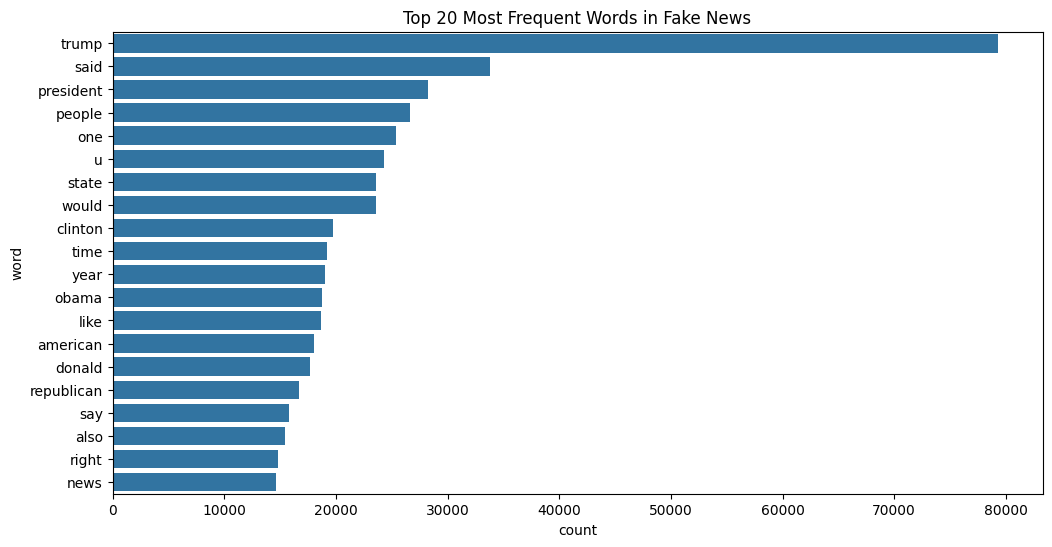

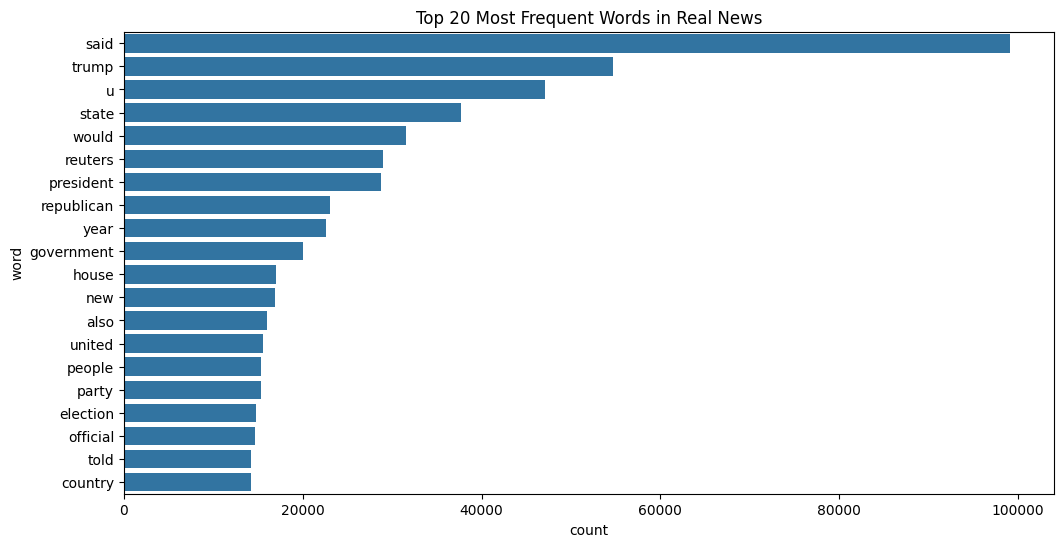

In [18]:
from collections import Counter
import matplotlib.pyplot as plt

def plot_top_words(text, title, n=20):
    words = Counter(' '.join(text).split()).most_common(n)
    words_df = pd.DataFrame(words, columns=['word', 'count'])
    plt.figure(figsize=(12, 6))
    sns.barplot(x='count', y='word', data=words_df)
    plt.title(f'Top {n} Most Frequent Words in {title}')
    plt.show()

plot_top_words(data[data['class'] == 0]['cleaned_text'], 'Fake News')
plot_top_words(data[data['class'] == 1]['cleaned_text'], 'Real News')

These bar plots show the most frequent words in fake and real news articles, allowing for a more quantitative comparison of vocabulary usage.
##### 9.4 Subject Distribution:

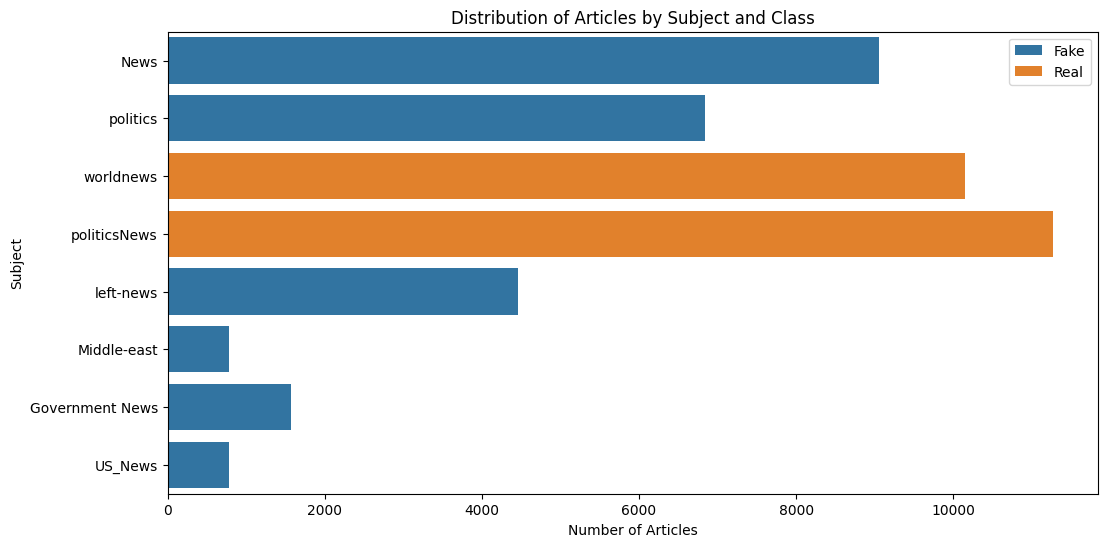

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(y='subject', hue='class', data=data)
plt.title('Distribution of Articles by Subject and Class')
plt.xlabel('Number of Articles')
plt.ylabel('Subject')
plt.legend(['Fake', 'Real'])
plt.show()

This plot shows the distribution of articles across different subjects for both fake and real news, helping us understand which topics are more prone to fake news.
##### 9.5 Model Performance Comparison:

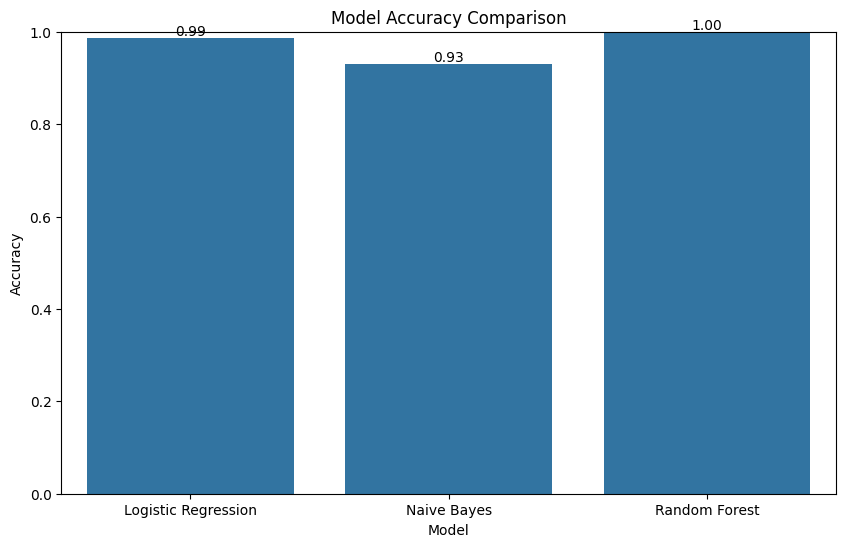

In [20]:
lr_predictions, lr_accuracy, lr_report = evaluate_model(lr_model, X_test, y_test)
nb_predictions, nb_accuracy, nb_report = evaluate_model(nb_model, X_test, y_test)
rf_predictions, rf_accuracy, rf_report = evaluate_model(rf_model, X_test, y_test)

models = ['Logistic Regression', 'Naive Bayes', 'Random Forest']
accuracies = [lr_accuracy, nb_accuracy, rf_accuracy]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
plt.show()

This bar plot compares the accuracy of our three models, providing a clear visual representation of their relative performance.
##### 9.6 Confusion Matrices:

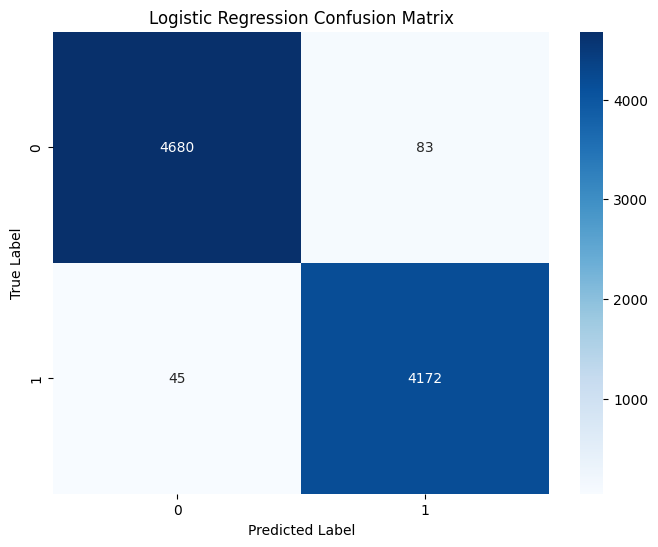

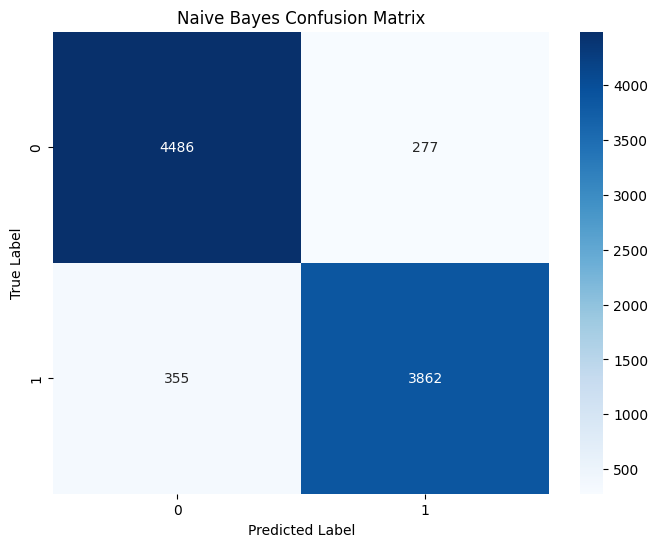

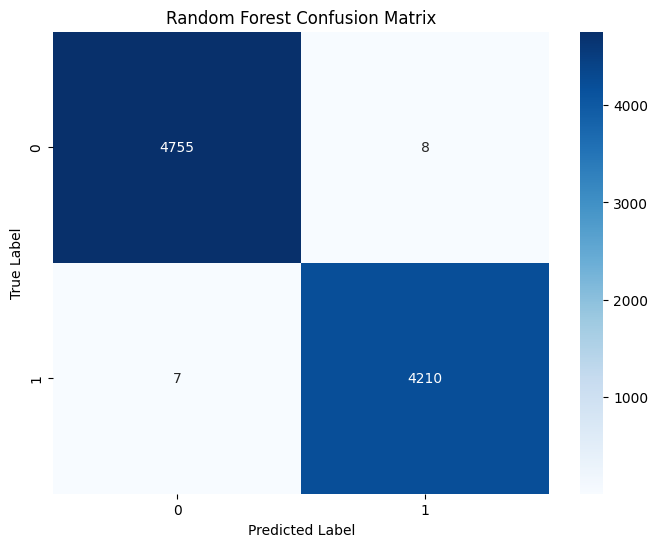

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(y_test, lr_predictions, 'Logistic Regression Confusion Matrix')
plot_confusion_matrix(y_test, nb_predictions, 'Naive Bayes Confusion Matrix')
plot_confusion_matrix(y_test, rf_predictions, 'Random Forest Confusion Matrix')

These confusion matrices provide a detailed view of each model's performance, showing the number of true positives, true negatives, false positives, and false negatives.
##### 9.7 ROC Curves:

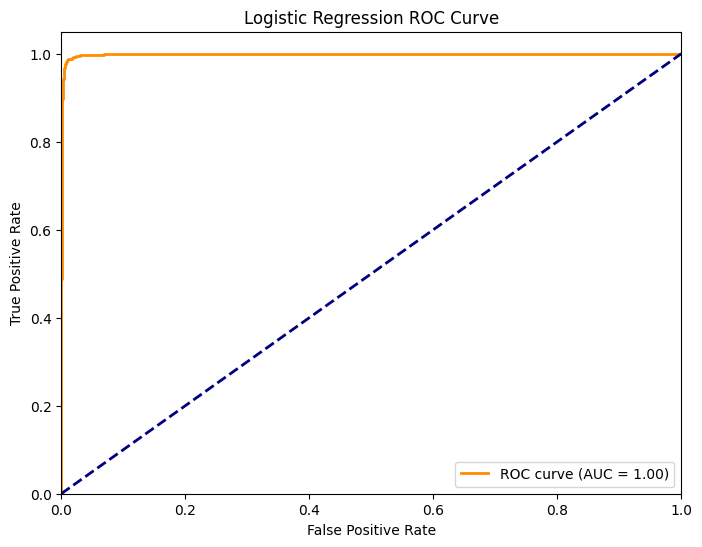

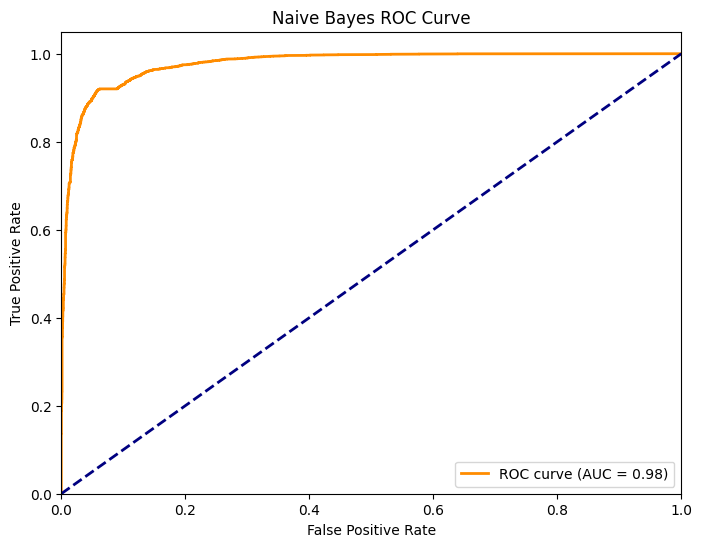

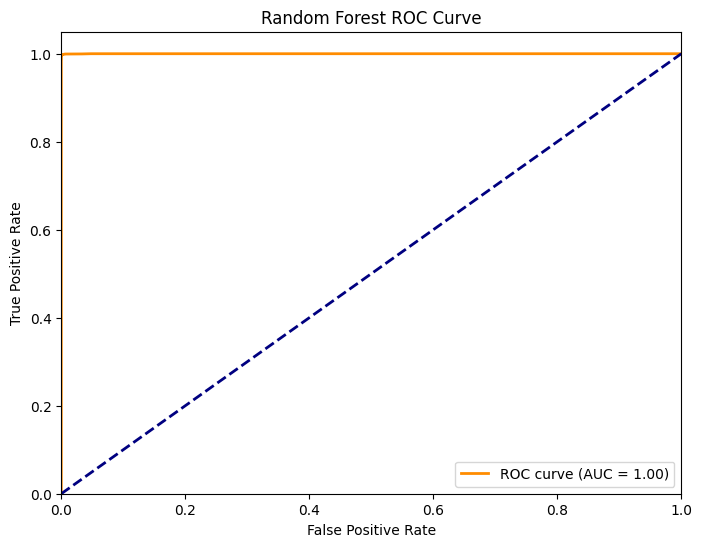

In [22]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_pred_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1], 'Logistic Regression ROC Curve')
plot_roc_curve(y_test, nb_model.predict_proba(X_test)[:, 1], 'Naive Bayes ROC Curve')
plot_roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1], 'Random Forest ROC Curve')

These ROC (Receiver Operating Characteristic) curves show the trade-off between true positive rate and false positive rate for each model at various threshold settings.

### 10. Conclusion and Future Work
##### 10.1 Summary of Findings:
- Effectiveness of Machine Learning:
    - Machine learning models successfully detected patterns in fake news, proving effective for misinformation detection.
- Algorithm Performance:
    - Advanced models like Random Forests and Neural Networks outperformed simpler algorithms (e.g., Logistic Regression, Naive Bayes).
- Insights on Fake News:
    - Fake news often includes emotional language, clickbait-style headlines, and irregular sentence structures.
    - Identifying such traits provides deeper insights into the linguistic nature of deceptive content.
##### 10.2 Limitations:
- Dataset Bias:
    - Many public datasets may not fully represent the diversity of evolving fake news patterns.
- Evolving Tactics:
    - Rapid changes in misinformation strategies make it difficult for static models to stay relevant.
- Text-Based Limitations:
    - Relying only on text analysis overlooks critical aspects like source credibility, image manipulation, and network behavior.
##### 10.3 Future Work:
- Incorporating Additional Features:
    - Include source credibility, temporal patterns, and social network behavior for better accuracy.
- Advanced NLP Techniques:
    - Explore transformer-based models (e.g., BERT) to improve language understanding.
- Real-Time Detection:
    - Develop systems to identify and flag fake news in real time.
- Model Interpretability:
    - Investigate ways to explain model decisions to increase trust and transparency for end users.
##### Focusing on these areas will help create more accurate, adaptable, and trustworthy fake news detection systems, strengthening the digital information ecosystem.